In [1]:
# load data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
# imgStack = io.imread('/Volumes/ahrenslab/Takashi/toZiqiang/10192017Fish3-1/raw.tif')
# plt.imshow(imgStack[0], cmap='gray')
# exImg = imgStack[0]'
# np.save('exImg',exImg)

#### Add top folder to the system

In [2]:
import os, sys
fish_path = os.path.abspath(os.path.join('..'))
if fish_path not in sys.path:
    sys.path.append(fish_path)

### slicing image to the size which is dividable by small patch-size (M). This is only done for explict noise model

In [3]:
exImg = np.load('exImg.npy')
slicedSize = 28 # 12 for M = 16, 28 for M=32
exImg = exImg[slicedSize:,:]

In [4]:
from pixelwiseDenoising.simpleDenioseTool import simpleDN
imgD_ = simpleDN(exImg, pixel_x=(772+slicedSize,1280), pixel_y=(832,1120))

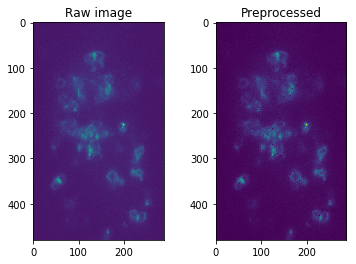

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(exImg)
ax1.set_title('Raw image')
ax2.imshow(imgD_)
ax2.set_title('Preprocessed')
f.savefig('comparison.png', dpi=1000)
plt.show()

In [6]:
M = 32 # make the result devidable # patch size
Pixelsize = 6.5 # pixel size is the property of the camera (make sure this value is correct)
Magnification = 20
Pixelsize = Pixelsize / Magnification
NA = 0.8 # numerical aperture of the objective
# emission should be changed according to the real experiment
Lambda = 0.500 # emission wavelength
w=1 # parameter for adjusted OTF
h=0.7 # parameter for adjusted OTF

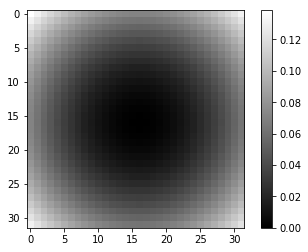

In [7]:
import pixelwiseDenoising.denoisetools as ncs 
OTFfilter = ncs.genfilter(M,Pixelsize,NA,Lambda,Type='OTFweighted',w=1,h=0.7)
plt.imshow(OTFfilter, cmap = plt.cm.gray)
plt.colorbar()

In [8]:
gain = np.load('../pixelwiseDenoising/gainMat20180208/gain_mat.npy')
var = np.load('../pixelwiseDenoising/gainMat20180208/var_mat.npy')
gain_ = gain[772+slicedSize:1280, 832:1120]
gain_[gain_ < 0] = 1e-6
var_ = var[772+slicedSize:1280, 832:1120]

In [9]:
alpha = 9 # weight factor of noise correction contribution (outside OTF) vs LLS (simplified negative log likelihood function)
iterationN = 30 # number of iterations
# # optical transfer function filter is defined using filter type (default is OTFweighted), w and h
out = ncs.reducenoise(M, imgD_,var_,gain_,Pixelsize,NA,Lambda,alpha,iterationN)

Elapsed time for noise reduction: 19.603065729141235


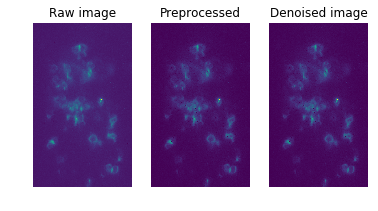

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(exImg)
ax1.set_title('Raw image')
ax1.axis('off')
ax2.imshow(imgD_)
ax2.set_title('Preprocessed')
ax2.axis('off')
ax3.imshow(out)
ax3.set_title('Denoised image')
ax3.axis('off')
f.savefig('comparison_alpha_9_0.png', dpi=1000)
plt.show()

In [11]:
alpha = 0.001 # weight factor of noise correction contribution vs LLS (simplified negative log likelihood function)
iterationN = 30 # number of iterations
# # optical transfer function filter is defined using filter type (default is OTFweighted), w and h
out = ncs.reducenoise(M, imgD_,var_,gain_,Pixelsize,NA,Lambda,alpha,iterationN)

Elapsed time for noise reduction: 22.29176616668701


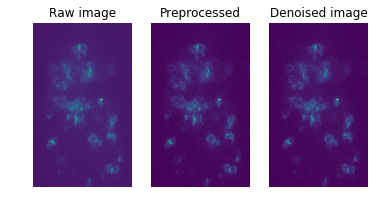

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(exImg)
ax1.set_title('Raw image')
ax1.axis('off')
ax2.imshow(imgD_)
ax2.set_title('Preprocessed')
ax2.axis('off')
ax3.imshow(out)
ax3.set_title('Denoised image')
ax3.axis('off')
f.savefig('comparison_alpha_0_0.png', dpi=1000)
plt.show()

### Offset matrix and gain matrix in 

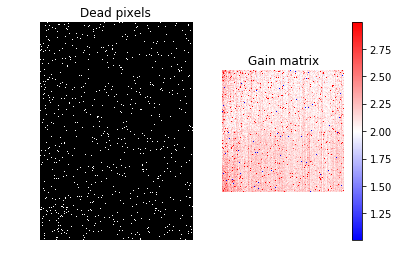

In [13]:
import matplotlib.colors as colors
f, (ax1, ax2) = plt.subplots(1, 2)
# place of dead pixels
ax1.pcolorfast(np.logical_or(gain<1.01, gain>2.99), cmap='gray')
ax1.set_title('Dead pixels')
ax1.axis('off')
cf = ax2.imshow(gain, cmap='bwr', norm=colors.Normalize(vmin=1.01,vmax=2.99))
ax2.set_title('Gain matrix')
ax2.axis('off')
f.colorbar(cf, ax=ax2)
f.savefig('gain_matrix.png', dpi=1000)
plt.show()